Segment 1: Importing Libraries and Loading Data
In this segment, the necessary libraries are imported. The dataset is loaded from a CSV file using pd.read_csv().

In [4]:

import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('emails.csv')


Segment 2: Data Preprocessing
In this segment, duplicates are removed from the dataset using df.drop_duplicates(inplace=True). The process_text function is defined to preprocess the text by removing punctuation and stopwords. The text is tokenized by applying the process_text function to the 'text' column and storing the result in a new 'text_tokens' column.

In [5]:
import nltk
nltk.download('stopwords')

df.drop_duplicates(inplace=True)


def process_text(text):
   
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

    return clean_words

df['text_tokens'] = df['text'].apply(process_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Segment 3: Splitting Data and Vectorizing Text
In this segment, the data is split into training and testing sets using train_test_split(). The text data is vectorized using CountVectorizer, which converts the text into a matrix of token counts. The vectorization is performed separately for the training and testing sets.



In [6]:

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['spam'], test_size=0.2, random_state=0)


vectorizer = CountVectorizer(analyzer=process_text)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)


Segment 4: Training and Evaluating the Model
In this segment, a Naive Bayes Classifier (MultinomialNB) is trained on the training data (X_train_bow and y_train). The model is then evaluated on both the training and testing datasets using various metrics such as classification report, confusion matrix, and accuracy score.


In [7]:

classifier = MultinomialNB()
classifier.fit(X_train_bow, y_train)


train_predictions = classifier.predict(X_train_bow)
print('Training Results:')
print(classification_report(y_train, train_predictions))
print('Confusion Matrix:\n', confusion_matrix(y_train, train_predictions))
print('Accuracy:', accuracy_score(y_train, train_predictions))


Training Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3457
           1       0.99      1.00      0.99      1099

    accuracy                           1.00      4556
   macro avg       0.99      1.00      0.99      4556
weighted avg       1.00      1.00      1.00      4556

Confusion Matrix:
 [[3441   16]
 [   1 1098]]
Accuracy: 0.996268656716418


In [8]:


test_predictions = classifier.predict(X_test_bow)
print('\nTesting Results:')
print(classification_report(y_test, test_predictions))
print('Confusion Matrix:\n', confusion_matrix(y_test, test_predictions))
print('Accuracy:', accuracy_score(y_test, test_predictions))



Testing Results:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       870
           1       0.99      0.98      0.98       269

    accuracy                           0.99      1139
   macro avg       0.99      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139

Confusion Matrix:
 [[866   4]
 [  6 263]]
Accuracy: 0.9912203687445127


Segment 5: Visualization
In this segment, dimensionality reduction is performed using Principal Component Analysis (PCA) to reduce the dimensionality of the vectorized text data (X_test_bow) to 2 components for visualization purposes. A heatmap is plotted to visualize the confusion matrix. A pie chart is created to show the distribution of predicted values. Linear regression is performed on the predicted values (test_predictions) to generate a regression line. Finally, a scatter chart is plotted to visualize the actual values vs. predicted values with the regression line.

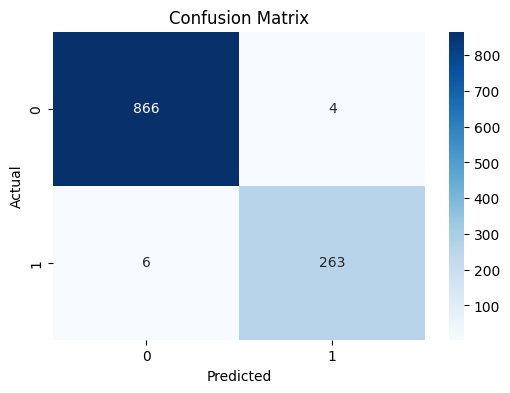

In [9]:

pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_bow.toarray())


plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



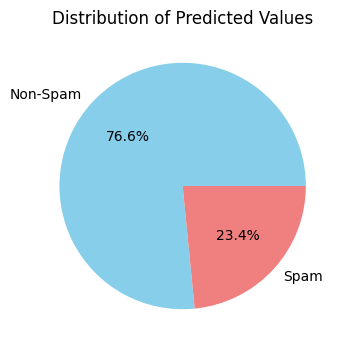

In [10]:

plt.figure(figsize=(6, 4))
pred_counts = np.bincount(test_predictions)
labels = ['Non-Spam', 'Spam']
plt.pie(pred_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Distribution of Predicted Values")
plt.show()




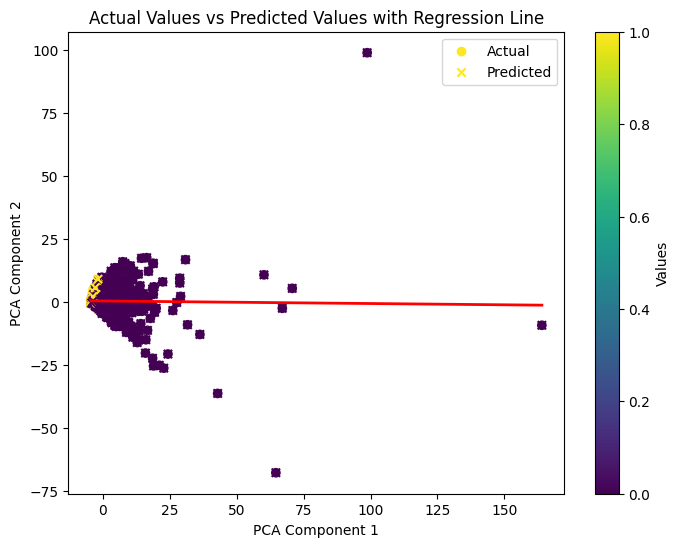

In [11]:
regression_model = LinearRegression()
regression_model.fit(X_test_pca, test_predictions)


x_line = np.linspace(X_test_pca[:, 0].min(), X_test_pca[:, 0].max(), 100)
y_line = regression_model.predict(np.column_stack((x_line, x_line)))


plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', label='Actual')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=test_predictions, cmap='viridis', marker='x', label='Predicted')
plt.plot(x_line, y_line, color='red', linewidth=2)
plt.title("Actual Values vs Predicted Values with Regression Line")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Values")
plt.legend()
plt.show()